# Getting Started with Edcrop

- In this example we compare the water balance outputs of Edcrop and Evacrop.
- Data can be downloaded from https://github.com/SteenChr/edcrop/tree/main/docs/data/quick_start and saved in a working directory.
- The working directory `wdir` can then be specified in the code block below.

In [1]:
#import necessary packages and set paths to .yaml file.
#the location of the climatic data is given in the yaml file.

from edcrop import edcrop
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

wdir = os.path.join(os.path.dirname(os.getcwd()))

os.chdir(os.path.join(wdir, 'data/quick_start/'))

yaml = 'edcrop.yaml'

edcrop.run_model(yaml=yaml)


Running edcrop version 0.0.6

Read input file edcrop.yaml.

Loop through simulations.

 Climate data file: Weatherdata_S1.edcrop_wf.

 Soil parameter values:  use default.

 Crop parameter values:  use default.

 Model parameter values:  update from input file.
  ed:
    plotseries: false
    prlistd: Date T P Ep I Ea Dsum Db Dmp
    prlisty: P Ep I Ea Dsum Db Dmp
    wbfunc: ed
    
===> Run Station1_JB1_WW_ed


 Model parameter values:  update from input file.
  Evacrop:
    plotseries: false
    prlistd: Date T P Ep I Ea Dsum Db Dmp Ve Vr Vb
    prlisty: P Ep I Ea Dsum Db Dmp Ve Vr Vb
    wbfunc: evacrop
    
===> Run Station1_JB1_WW_Evacrop


 Crop parameter values:  use default.

 Model parameter values:  update from input file.
  ed:
    plotseries: false
    prlistd: Date T P Ep I Ea Dsum Db Dmp
    prlisty: P Ep I Ea Dsum Db Dmp
    wbfunc: ed
    
===> Run Station1_JB1_WM_ed


 Model parameter values:  update from input file.
  Evacrop:
    plotseries: false
    prlistd: Date

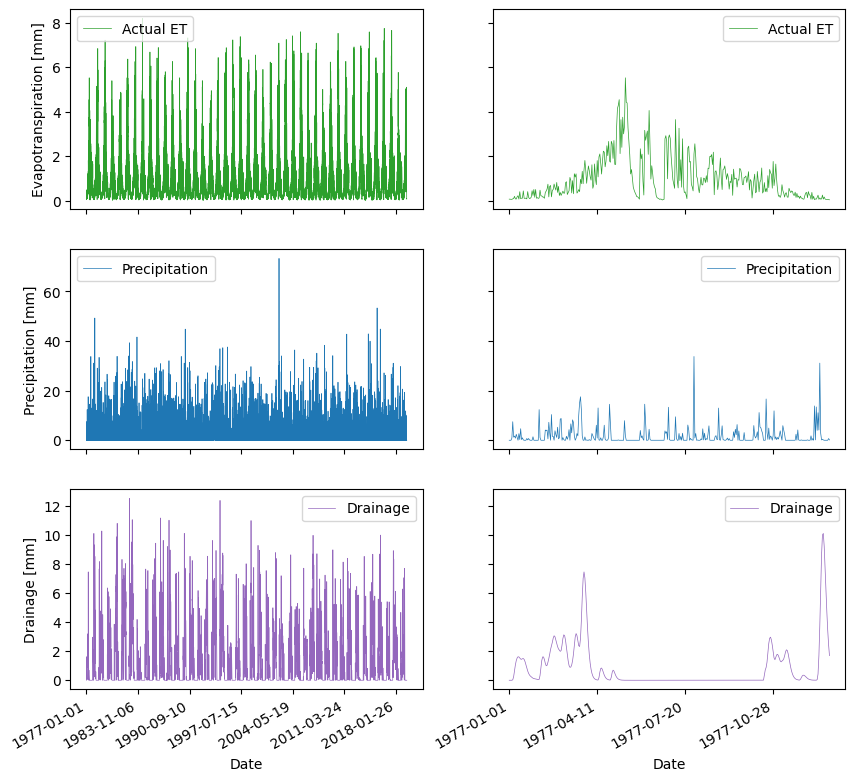

In [5]:
# read the data file, as specified in the documentation, the filename contains information about the simulation.
# for instance, in Station1_JB1_WW_ed_wb.out, JB1 is the soil type, WW is the crop type (winter wheat), and ed specifies that edcrop was used (as opposed to Evacrop)
df = pd.read_csv('Station1_JB1_WW_ed_wb.out')
df.columns = df.columns.str.replace(' ', '')

df_sub = df.iloc[0:365,:]

fig, axs = plt.subplots(3,2, sharex = 'col', sharey='row', figsize=(10,10))

df.plot.line(x='Date', y='Ea', ax=axs[0,0], c='C2', label='Actual ET', lw=0.5)
df.plot.line(x='Date', y='P', ax=axs[1,0], c='C0', label='Precipitation', lw=0.5)
df.plot.line(x='Date', y='Dsum', ax=axs[2,0], c='C4', label='Drainage', lw=0.5)


df_sub.plot.line(x='Date', y='Ea', ax=axs[0,1], c='C2', label='Actual ET', lw=0.5)
df_sub.plot.line(x='Date', y='P', ax=axs[1,1], c='C0', label='Precipitation', lw=0.5)
df_sub.plot.line(x='Date', y='Dsum', ax=axs[2,1], c='C4', label='Drainage', lw=0.5)

axs[0,0].set_ylabel('Evapotranspiration [mm]')
axs[1,0].set_ylabel('Precipitation [mm]')
axs[2,0].set_ylabel('Drainage [mm]')

fig.autofmt_xdate()

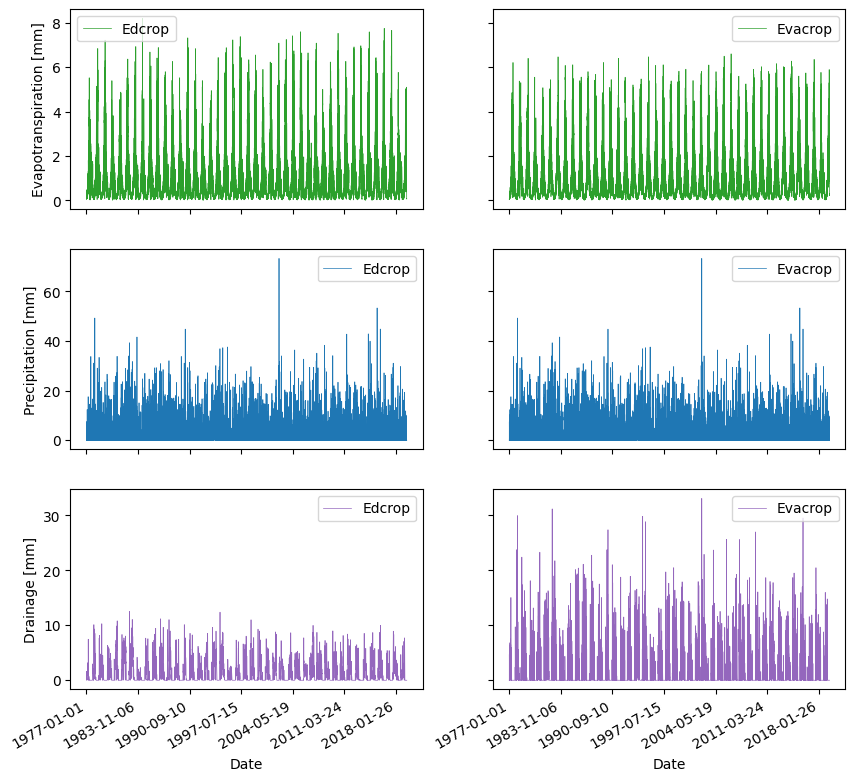

In [17]:
# in the below plot we can compare directly the results from edcrop and evacrop
df2 = pd.read_csv('Station1_JB1_WW_Evacrop_wb.out')
df2.columns = df2.columns.str.replace(' ', '')

fig, axs = plt.subplots(3,2, sharex = 'col', sharey='row', figsize=(10,10))

df.plot.line(x='Date', y='Ea', ax=axs[0,0], c='C2', label='Edcrop', lw=0.5)
df2.plot.line(x='Date', y='Ea', ax=axs[0,1], c='C2', label='Evacrop', lw=0.5)
df.plot.line(x='Date', y='P', ax=axs[1,0], c='C0', label='Edcrop', lw=0.5)
df2.plot.line(x='Date', y='P', ax=axs[1,1], c='C0', label='Evacrop', lw=0.5)
df.plot.line(x='Date', y='Dsum', ax=axs[2,0], c='C4', label='Edcrop', lw=0.5)
df2.plot.line(x='Date', y='Dsum', ax=axs[2,1], c='C4', label='Evacrop', lw=0.5)

#df_sub.plot.line(x='Date', y='Ea', ax=axs[0,1], c='C2', label='Actual ET', lw=0.5)
#df_sub.plot.line(x='Date', y='P', ax=axs[1,1], c='C0', label='Precipitation', lw=0.5)
#df_sub.plot.line(x='Date', y='Dsum', ax=axs[2,1], c='C4', label='Drainage', lw=0.5)

axs[0,0].set_ylabel('Evapotranspiration [mm]')
axs[1,0].set_ylabel('Precipitation [mm]')
axs[2,0].set_ylabel('Drainage [mm]')

fig.autofmt_xdate()